# Thera Bank Personal Loan Campaign

## Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

## Domain:
Banking

 

## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

## Attribute Information:
 - ID: Customer ID
 - Age: Customer's age in completed years
 - Experience: #years of professional experience
 - Income: Annual income of the customer
 - ZIP Code: Home Address ZIP
 - Family: Family size of the customer
 - CCAvg: Avg. spending on credit cards per month
 - Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
 - Mortgage: Value of house mortgage if any.
 - Personal Loan: Did this customer accept the personal loan offered in the last campaign?
 - Securities Account: Does the customer have a securities account with the bank?
 - CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
 - Online: Does the customer use internet banking facilities?
 - Credit card: Does the customer use a credit card issued by the bank?
 

## Learning Outcomes:
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
 

## Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [27]:
import numpy as np # numeric library
import pandas as pd # data manipulation and storage library
import matplotlib.pyplot as plt # basic graphing library
import seaborn as sns # improves graphing visuals

from sklearn.linear_model import LogisticRegression # the training model we will use to classify customers
from sklearn.model_selection import train_test_split # splits the data in to training and test data
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, plot_roc_curve
from sklearn.preprocessing import MinMaxScaler  # used to normalize the continous variables to achieve a better fit

# Graphing Display Options
%matplotlib inline
sns.set(color_codes=True)

# Sets the notebook to display across the entire width of the monitor.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [28]:
# Read the data
dfBank = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
dfBank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [29]:
dfBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Notice all features, including the categorical variables, are currently stored as numerical information.

In [30]:
dfBank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Mortgage has a very large right skew and its standard deviation is larger than its mean.  This makes sense because a decent proportion of the mortgage values are zero.

Roughly half of the accounts are online.

Experience has nearly the exact same standard deviation as age, so they may be strongly dependent.

Experience also has negative values which I assume are incorrectly entered.

In [31]:
dfBank.shape

(5000, 14)

In [32]:
dfBank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No missing or null values are present in the data set.

### 2. EDA: Study the data distribution in each attribute and target variable, share your findings

In [33]:
dfBank.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

ID will not be needed as it is not an actual variable; the row index will function in exactly the same way.

Family, Education, Personal Loan, Securities Account, CD Account, Online, and Credit Card are all categorical variables with a low number of unique values.

With 467 unique Zip Codes and only 5000 customers in the data set, there are not enough entries to use Zip Code as a categorical variable.  We will drop it along with ID.

In [34]:
# Dropping ID and Zip Code from the data set
dfBank.drop(labels=["ID"], axis=1, inplace=True)
dfBank.drop(labels=["ZIP Code"], axis=1, inplace=True)
dfBank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


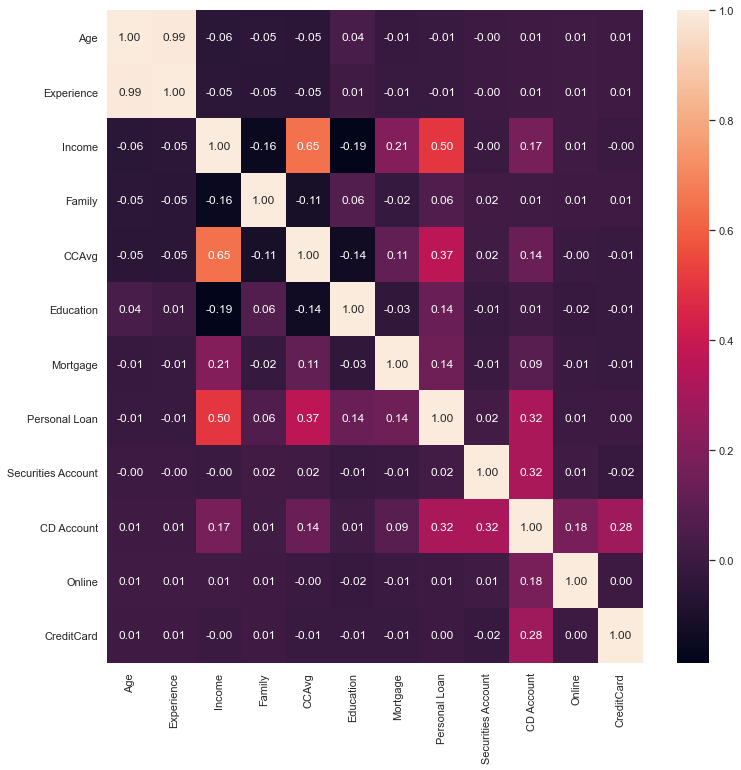

In [35]:
# Plotting a heatmap of the feature correlation to check if any of the variables are dependent of eachother.
plt.figure(figsize=(12,12))
sns.heatmap(data=dfBank.corr(), annot=True, fmt=".2f");

Experience and Age have a correlation of 0.99 which indicates they are linearly dependent.  Since the logistical regression models assume features are independent of each other, we will drop Experience to eliminate this dependency.

In [36]:
# Removing experience from the dataset.
dfBank.drop(labels=["Experience"], axis=1, inplace=True)
dfBank.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [37]:
# Finding the number of customers owing zero mortgage.
print("Number of custermers with zero mortgage:",dfBank[dfBank["Mortgage"]==0].shape[0])
print("Most customers have zero mortgage.")

Number of custermers with zero mortgage: 3462
Most customers have zero mortgage.


In [38]:
# Finding the number of people who spend zero on their credit card each month.
print("Number of customers with zero credit card spending per month:",dfBank[dfBank["CreditCard"]==0].shape[0])
print("Most customers spend zero on their credit card each month.")

Number of customers with zero credit card spending per month: 3530
Most customers spend zero on their credit card each month.


In [39]:
# Classifying each feature that is a categorical variable as such in the dataset.
dfBank["Family"] = dfBank["Family"].astype("category")
dfBank["Education"] = dfBank["Education"].astype("category")
dfBank["Personal Loan"] = dfBank["Personal Loan"].astype("category")
dfBank["Securities Account"] = dfBank["Securities Account"].astype("category")
dfBank["CD Account"] = dfBank["CD Account"].astype("category")
dfBank["Online"] = dfBank["Online"].astype("category")
dfBank["CreditCard"] = dfBank["CreditCard"].astype("category")

In [40]:
dfBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   Family              5000 non-null   category
 3   CCAvg               5000 non-null   float64 
 4   Education           5000 non-null   category
 5   Mortgage            5000 non-null   int64   
 6   Personal Loan       5000 non-null   category
 7   Securities Account  5000 non-null   category
 8   CD Account          5000 non-null   category
 9   Online              5000 non-null   category
 10  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(3)
memory usage: 191.3 KB


In [41]:
# Printing the value counts for all categorical variables.
for col in dfBank.columns[dfBank.dtypes=="category"]:
    print(dfBank[col].value_counts())
    print()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



The four different types of family sizes are well represented.

Roughly 10% of customers have a personal loan, a securities account or a CD account.

Most customers have an online account.

Less than half of customers have a credit card.

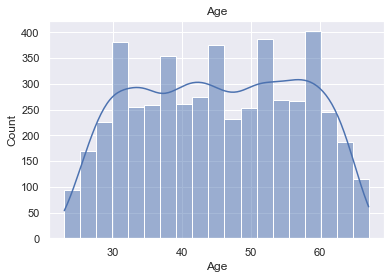

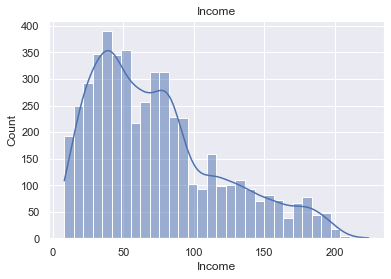

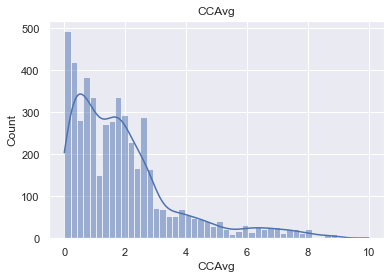

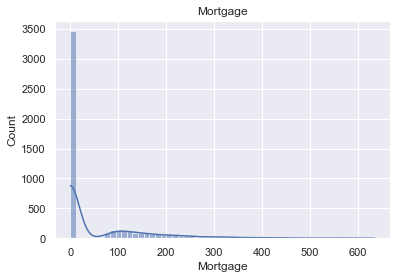

In [42]:
# Univariate histogram plots for all continuous variables.
for col in dfBank.columns[dfBank.dtypes!="category"]:
    sns.histplot(x=dfBank[col], kde=True).set_title(col);
    plt.show()

Age is nearly uniformly distributed.

Income and CCAvg are both skewed to the right.  Income of a random population should always skew to the right so that is a good sign.  CCAvg should skew right as well because most customers don't have a credit card and the majority of customers will spend proportional to their income, which is also skewed right.

Most customers do not have a mortgage as the histogram shows.  The mortgage data is also skewed to the right which matches with normal home value distributions in the world.

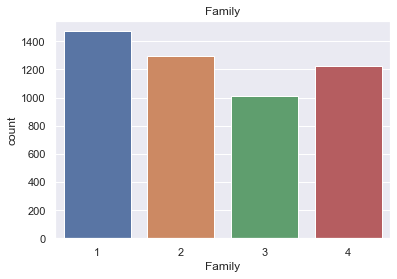

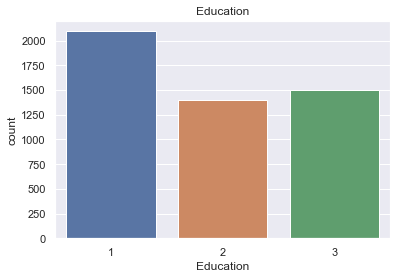

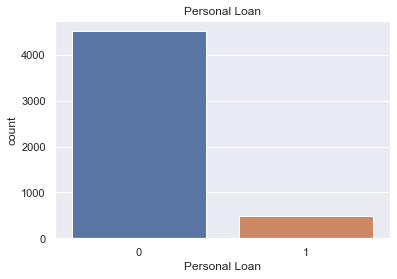

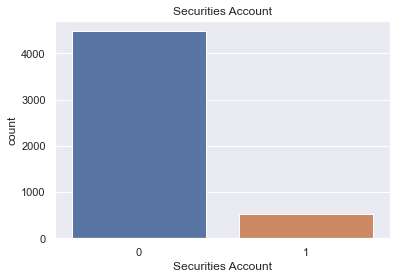

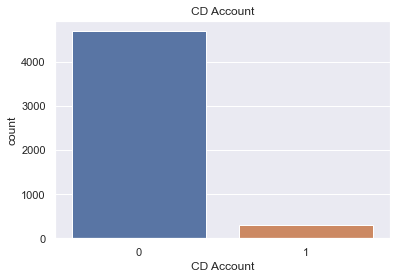

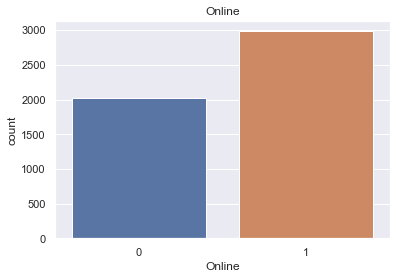

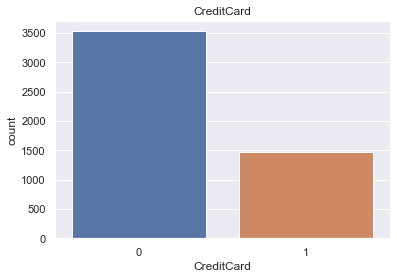

In [43]:
# Countplots for all categorical variables.
for col in dfBank.columns[dfBank.dtypes=="category"]:
    sns.countplot(x=dfBank[col]).set_title(col);
    plt.show()

Personal Loan is very weighted towards the 0, so we will need to stratify our random sampling when splitting our data for training and testing our model.

Family, Education and Online are the most equally represented categories.  All others are highly shifted one way or the other.

<Figure size 7200x7200 with 0 Axes>

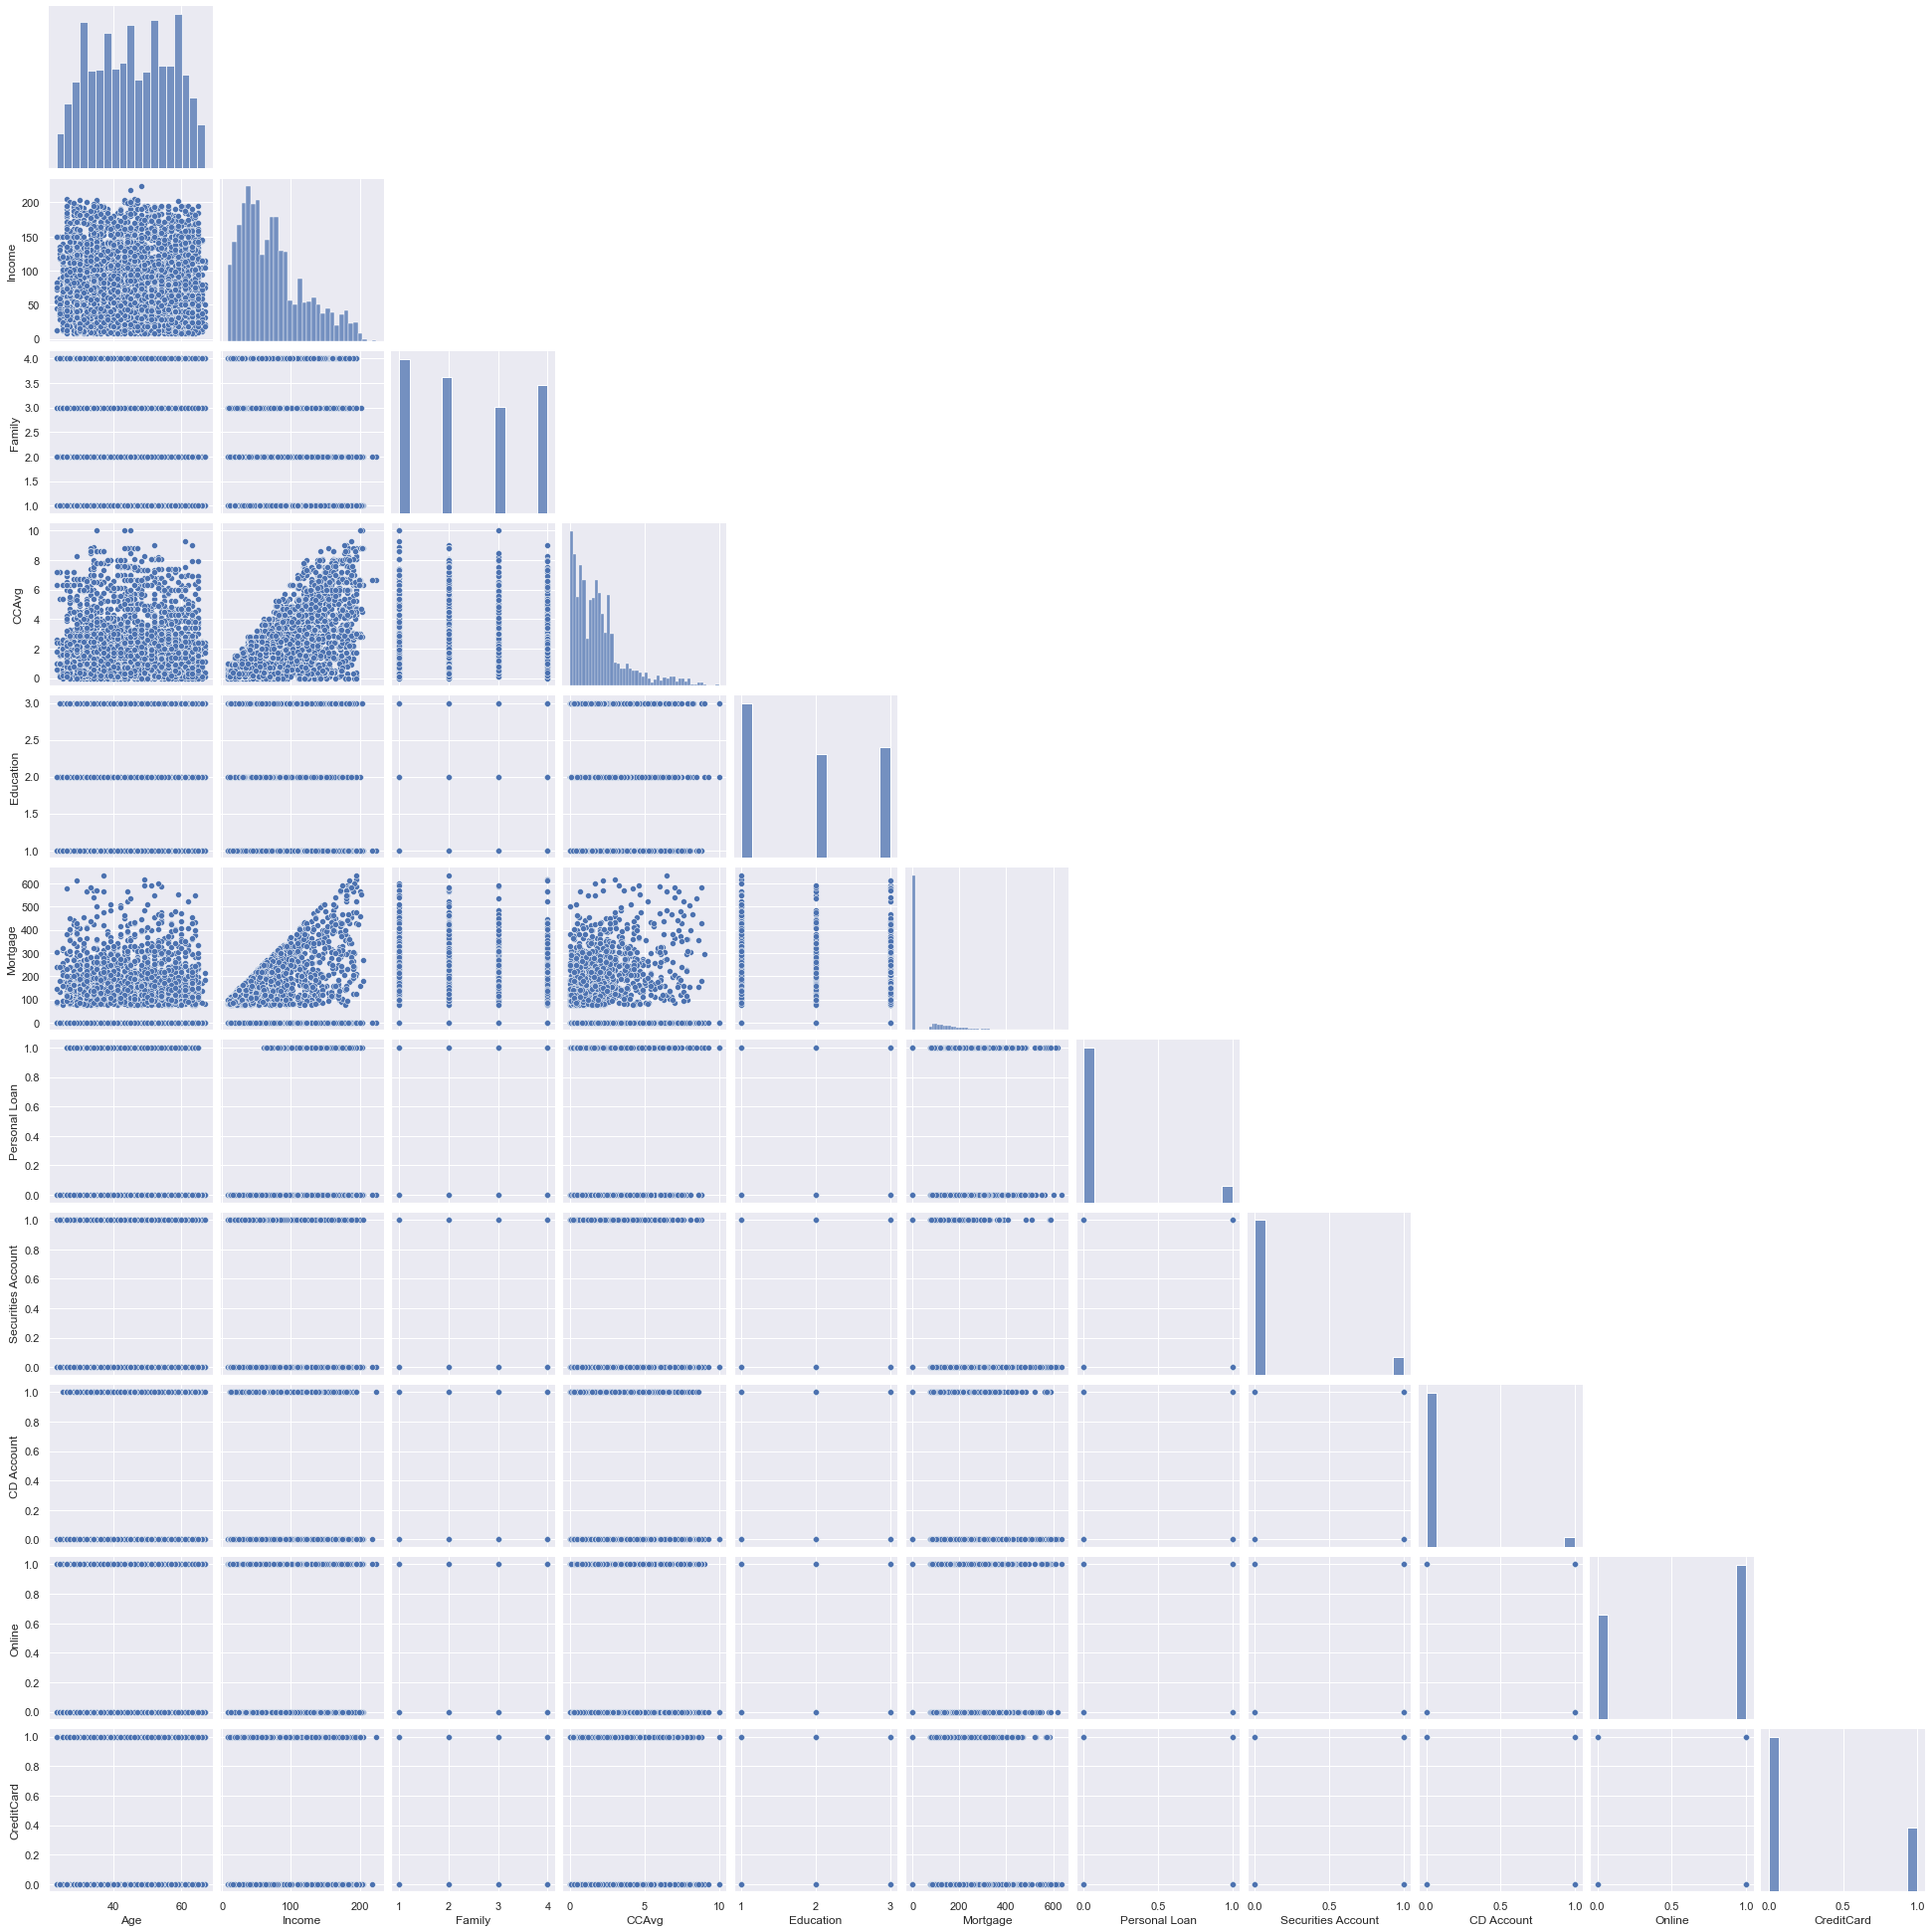

In [44]:
# Bivariate analysis between all variables
plt.figure(figsize=(100,100))
sns.pairplot(data=dfBank.astype("float64"), corner=True);

The bivariate scatterplots above suggest that most all of the features are not dependent (or at least not strongly dependent) on one another.  This is important because Logistic Regression assumes the features are independent of one another.  Mortgage and CCAvg seem like they may be weakly dependent on income, which makes sense with how most people live.

Since Family and Education are categorical variables with more than just 0 or 1, we need to create dummy variables using one-hot encoding.

In [45]:
# Creating dummy variables (One-hot encoding) for Family and Education.  
dfBank = pd.get_dummies(data=dfBank, columns=["Family","Education"], drop_first=True)
dfBank.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,25,49,1.6,0,0,1,0,0,0,0,0,1,0,0
1,45,34,1.5,0,0,1,0,0,0,0,1,0,0,0
2,39,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,100,2.7,0,0,0,0,0,0,0,0,0,1,0
4,35,45,1.0,0,0,0,0,0,1,0,0,1,1,0


Since training models fit normalized data better we will normalize the continuous variables.  This also allows for their scales to not impact their respective coefficients in the Logistic Regression model so we can more easily compare which features have more impact than others.

In [46]:
# Normalizing the continuous variables
dfBank = pd.DataFrame(MinMaxScaler(copy=False).fit_transform(X=dfBank),columns=dfBank.columns)

### 3. Split the data into training and test set in the ratio of 70:30 respectively
### 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not.

In [48]:
# Splitting the dataset into independent (x) and dependent (y) variables
x = dfBank.drop(labels="Personal Loan", axis=1)
y = dfBank["Personal Loan"]

In [49]:
x.head() # checking features

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,0.045455,0.189815,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.500000,0.120370,0.15,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.363636,0.013889,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.272727,0.425926,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.272727,0.171296,0.10,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [51]:
y.head() # checking target variable

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Personal Loan, dtype: float64

In order to achieve a higher success ratio than the prior campaign, we need to determine the best threshold for the Logistic Model.  The below lambda function takes in a predicted probability, compares the value with the current threshold provided, and then returns 1 if it exceeds that threshold and 0 if it does not.  Thus returning the prediction for that customer based on the given threshold.

In [58]:
# x is the predicted probability of this customer getting a personal loan
#y is the current threshold
threshold = lambda x,y: 1 if x > y else 0

In [59]:
# Defines a dataframe to store all metric information for model as we change the threshold and randomly split the data in different ways.
dfThreshold = pd.DataFrame(columns=["Threshold","Accuracy","Recall","Precision","F1 Score", "ROC AUC Score", "Random Split"])

### Fitting the Logistic Regression Model
- First we define the logistic regression model, including in it the fit_intercept since this provides better fitting in this case.
- The main loop (i) iterates through 25 different random integers to train the model on 25 different train/test splits.
    - This allows us to calculate average scores thus minimizing dependency on how exactly the data was split.
    - The target variable is also stratified so that we have an equal percentage of Personal Loan customers in both the training and testing data.  This is recommended since the Personal Loan data is highly skewed.
    - I originally trained the model without doing this and it sometimes differed significantly in the final metrics.
- The second loop (j) iterates through 31 different thresholds from 0.4 to 0.7, incrementing in the hundredths place (or 1%).
    - This range in thresholds was choosen after manually looping through 0.1 to 0.9 by tenths and finding this to be the range to more granually focus.
    - Our goal is to do a marketing campaign on a tight budget so we are looking for a rather high precision so as not to waste our money on targeting individuals who aren't very likely to sign up for the personal loan.
    - We also have to balance this against the recall score and such.
- Each cell in the model is then evaluated using the theshold function to see if it meets the current threshold.
- The metric scores of accuracy, recall, precision, F1 and ROC AUC are recorded for each model to be evaluated below.

In [60]:
# Initializes our logistic regression model
logModel = LogisticRegression(random_state=1, fit_intercept=True)


# Loops through 25 different random splittings of the data for training and testing
for i in np.arange(0,25):
    randomSplit = np.random.randint(low=0, high = 99999999)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=randomSplit, stratify=y) # startifying based on our target variable Personal Loan to acheive equal amounts of 0's and 1's in the split
    
    # Loops through 31 differnt threshold values ranging form 0.4 to 0.7
    for j in np.arange(0,31):
        currentThreshold = 0.4 + j/100 # from 0.4 to 0.7 threshold
    
        logModel.fit(X=x_train, y=y_train) # fits the current model to the current training data
        
        ypred = logModel.predict_proba(X=x_test)[:,1] # calculates the predicted probability for the current test data
        ypred = pd.DataFrame(ypred) # stores the probabilities of a customer choosing the personal loan
        
        # Applies the threshold function to map the probabilities of each customer to a binary prediction based on the current threshold
        for cell in np.arange(0,ypred.shape[0]):
            ypred.iloc[cell,0] = threshold(ypred.iloc[cell,0], currentThreshold)
            
        # Calculates and stores the metric scores for the current model and what random Split it occured on
        dfThreshold.loc[len(dfThreshold.index)] = [currentThreshold,
                                                   accuracy_score(y_true=y_test, y_pred=ypred),
                                                   recall_score(y_true=y_test, y_pred=ypred),
                                                   precision_score(y_true=y_test, y_pred=ypred),
                                                   f1_score(y_true=y_test, y_pred=ypred),
                                                   roc_auc_score(y_true=y_test, y_score=ypred),
                                                   randomSplit]

In [61]:
dfThreshold # Displays a snippet of the results

,Threshold,Accuracy,Recall,Precision,F1 Score,ROC AUC Score,Random Split
0,0.40,0.960000,0.708333,0.850000,0.772727,0.847529,27634697.0
1,0.41,0.962000,0.708333,0.871795,0.781609,0.848636,27634697.0
2,0.42,0.961333,0.701389,0.870690,0.776923,0.845163,27634697.0
3,0.43,0.962000,0.694444,0.884956,0.778210,0.842429,27634697.0
4,0.44,0.962000,0.694444,0.884956,0.778210,0.842429,27634697.0
...,...,...,...,...,...,...,...
770,0.66,0.948667,0.486111,0.958904,0.645161,0.741949,20390606.0
771,0.67,0.949333,0.486111,0.972222,0.648148,0.742318,20390606.0
772,0.68,0.948667,0.479167,0.971831,0.641860,0.738846,20390606.0
773,0.69,0.948000,0.472222,0.971429,0.635514,0.735374,20390606.0


Below we group all 775 models by their common thresholds to find the mean metrics for each threshold.

In [75]:
# Finding the mean metrics for each threshold, the Random Split column's mean has no meaning so we are not including it
dfMean = dfThreshold.groupby("Threshold")[["Accuracy","Recall","Precision","F1 Score", "ROC AUC Score"]].mean()
dfMean

,Accuracy,Recall,Precision,F1 Score,ROC AUC Score
Threshold,,,,,
0.40,0.958240,0.678889,0.856928,0.757213,0.833397
0.41,0.958133,0.671389,0.862559,0.754683,0.829986
0.42,0.958027,0.664167,0.868219,0.752219,0.826700
0.43,0.957787,0.655556,0.873787,0.748706,0.822719
0.44,0.957893,0.651111,0.879610,0.747836,0.820792
0.45,0.957760,0.645556,0.883815,0.745576,0.818235
0.46,0.957680,0.639722,0.889031,0.743489,0.815584
0.47,0.957280,0.633056,0.891108,0.739655,0.812383
0.48,0.956827,0.625278,0.893709,0.735238,0.808657


Since we are doing a marketing campaign on a tight budget we need to make the most of our money.  Therefore, we need a high precision so that a large percentage of our customers we are advertising to will sign up for the personal loan.

Thus, we want to have a rather high precision score while hopefully keeping recall at an acceptable rate.  Without quantitative values for how much the marketing per customer costs and how much on average the bank makes for each customer off of the personal loan we can't be too exact on our precision score we are shooting for.  With that in mind, I am trying to achieve a precision score of about 0.9.

### Scatterplots showing how the metric values change for each threshold.

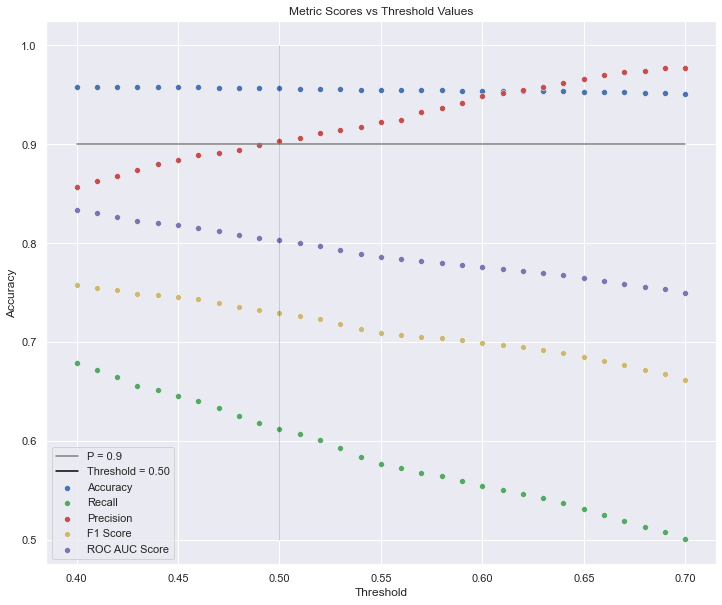

In [293]:
# Scatterplots of each metric in a different color vs the threshold values.
plt.figure(figsize=(12,10))
sns.scatterplot(x=dfMean.index, y=dfMean["Accuracy"], color="b")
sns.scatterplot(x=dfMean.index, y=dfMean["Recall"], color="g")
sns.scatterplot(x=dfMean.index, y=dfMean["Precision"], color="r")
sns.scatterplot(x=dfMean.index, y=dfMean["F1 Score"], color="y")
sns.scatterplot(x=dfMean.index, y=dfMean["ROC AUC Score"], color="m")

# Plotting a horizontal line at 0.9 to identify what threshold value gets the model to a precision score of 0.9.
# This occurs at a threshold of around 0.5
sns.lineplot(x=[.4,.7], y=[.9,.9], color="grey")
sns.lineplot(x=[.5,.5], y=[.5,1], color="blacK").set_title("Metric Scores vs Threshold Values")

# Adding a legend to make the graph legible
plt.legend(["P = 0.9","Threshold = 0.50","Accuracy","Recall","Precision","F1 Score", "ROC AUC Score"])
plt.show()

The above plots show a precision of 0.9 is first achieved when the threshold probability is greater than 0.50.  The recall is not as good unfortunately at just above 0.6.

Now, we need to make a Logistic Regression model based on the average of our 0.5 threshold coefficients and intercepts.

In [90]:
# Creating a dataframe of all the logistic regression models for the 0.5 threshold with their given data splits
dfFinalModel = dfThreshold[dfThreshold["Threshold"]==0.5]
dfFinalModel

,Threshold,Accuracy,Recall,Precision,F1 Score,ROC AUC Score,Random Split
10,0.5,0.964667,0.673611,0.941748,0.785425,0.834593,27634697.0
41,0.5,0.956000,0.611111,0.897959,0.727273,0.801868,70505672.0
72,0.5,0.952667,0.576389,0.892473,0.700422,0.784507,52810968.0
103,0.5,0.957333,0.611111,0.916667,0.733333,0.802606,42112468.0
134,0.5,0.954667,0.604167,0.887755,0.719008,0.798027,14767024.0
165,0.5,0.959333,0.618056,0.936842,0.744770,0.806815,18169639.0
196,0.5,0.956000,0.618056,0.890000,0.729508,0.804972,19629315.0
227,0.5,0.959333,0.638889,0.910891,0.751020,0.816126,95032506.0
258,0.5,0.955333,0.604167,0.896907,0.721992,0.798396,64814566.0
289,0.5,0.951333,0.604167,0.844660,0.704453,0.796184,33584344.0


Below we will find the coefficients and intercepts for each of the 25 models from above.

In [358]:
coeffHolder = pd.DataFrame(columns=np.append(x_train.columns,"Intercept"))

# Looping through all of the 25 models grabbing their randomSplit integer
for randomSplit in dfFinalModel["Random Split"]:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=int(randomSplit), stratify=y) # startifying based on our target variable Personal Loan to acheive equal amounts of 0's and 1's in the split
    currentThreshold = 0.5 # the threshold we choose earlier as our "best" threshold
    logModel.fit(X=x_train, y=y_train) # fits the current model to the current training data
    coeffHolder.loc[len(coeffHolder)] = np.append(arr=logModel.coef_[0], values=logModel.intercept_[0]) # storing the coefficients and intercepts in the dataframe
    
coeffHolder

,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Intercept
0,0.117733,9.086112,2.191807,0.433423,-0.504314,2.797819,-0.548525,-0.872547,-0.196076,1.337981,1.240135,2.548657,2.686089,-8.890217
1,0.154603,9.426668,2.149268,0.335730,-0.630875,3.002455,-0.563427,-0.675026,-0.090684,1.441403,1.058689,2.938056,3.053705,-9.388185
2,0.013095,9.122673,2.371226,0.413506,-0.689457,3.133183,-0.630375,-0.825703,-0.259297,1.471801,1.022082,2.763070,2.870090,-9.028149
3,0.094379,9.151779,2.063902,0.647928,-0.670774,2.807083,-0.620566,-0.761562,-0.190677,1.063470,0.749012,2.908157,3.015632,-8.921969
4,0.161401,9.203071,2.254627,0.465581,-0.545191,2.878694,-0.682206,-0.651813,-0.209115,1.335243,1.189968,2.725849,2.993163,-9.182293
5,0.437617,9.276052,2.017046,0.491450,-0.544717,2.805455,-0.618127,-0.643769,-0.310989,1.117455,1.080929,2.864089,2.916816,-9.230043
6,0.264739,9.083436,2.126960,0.792433,-0.964986,2.932508,-0.583313,-0.610792,-0.122312,1.198882,0.999840,2.873745,2.952892,-9.150254
7,0.306015,9.401947,1.984010,0.686485,-0.629722,2.747998,-0.451112,-0.754583,-0.246040,1.263664,1.121753,2.851329,2.902584,-9.316018
8,0.434537,9.109120,2.026468,0.656006,-0.623067,2.846625,-0.512718,-0.807568,-0.247185,1.266837,1.095455,2.668018,2.885785,-9.168429
9,0.180484,8.986181,2.248240,0.332931,-0.344363,2.888014,-0.500370,-0.738199,-0.279049,1.370476,1.004498,2.526732,2.722952,-8.895163


Finally, we will make the final Logistic Regression model with these average attributes.

In [359]:
# Average Coefficients
coeffHolder.mean()[:-1]

Age                   0.198010
Income                9.203440
CCAvg                 2.079294
Mortgage              0.583945
Securities Account   -0.634527
CD Account            2.868469
Online               -0.547281
CreditCard           -0.752184
Family_2             -0.188244
Family_3              1.343900
Family_4              1.109246
Education_2           2.706189
Education_3           2.861473
dtype: float64

In [360]:
# Average Intercept
coeffHolder.mean()[-1:]

Intercept   -9.113733
dtype: float64

In [361]:
logModel.coef_ = np.array([coeffHolder.mean()[:-1]]) # setting the average coefficient for each feature as the coefficients for the final Logistic Model
logModel.intercept_ = [coeffHolder.mean()[-1:]] # setting the average intercept as the intercept for the final Logistic Model

### 4. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix

In [362]:
ypred = logModel.predict_proba(X=x_test)[:,1] # calculates the predicted probability for the current test data
ypred = pd.DataFrame(ypred) # stores the probabilities of a customer choosing the personal loan
        
# Applies the threshold function to map the probabilities of each customer to a binary prediction based on the current threshold
for cell in np.arange(0,ypred.shape[0]):
    ypred.iloc[cell,0] = threshold(ypred.iloc[cell,0], currentThreshold)

In [363]:
ypred.value_counts() # Number of predicted no (0) and predicted yes (1)

0.0    1415
1.0      85
dtype: int64

Accuracy Score: 0.9513333333333334 

Recall Score: 0.5416666666666666 

Precision Score: 0.9176470588235294 

F1 Score: 0.6812227074235807 

ROC AUC Score: 0.7682522123893805 



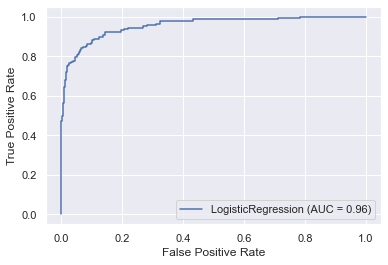

In [364]:
print("Accuracy Score:", accuracy_score(y_true=y_test, y_pred=ypred), "\n")
print("Recall Score:", recall_score(y_true=y_test, y_pred=ypred), "\n")
print("Precision Score:", precision_score(y_true=y_test, y_pred=ypred), "\n")
print("F1 Score:", f1_score(y_true=y_test, y_pred=ypred), "\n")
print("ROC AUC Score:", roc_auc_score(y_true=y_test, y_score=ypred), "\n")

plot_roc_curve(estimator=logModel, X=x_test, y=y_test);

In [365]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

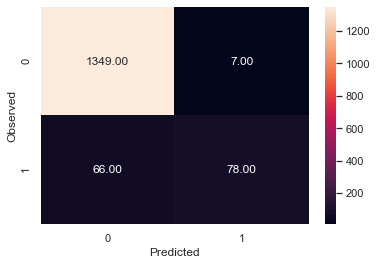

In [366]:
draw_cm(y_test, ypred) # Show the confusion matrix

Since the predicted 1's are who we will target in our marketing campaign we should waste very little money with so many in the true positve (1,1) category compared to the false positive category.

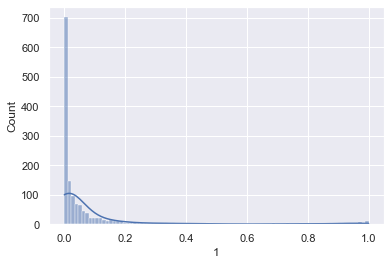

In [367]:
# Probability distribution over all test data
sns.histplot(pd.DataFrame(logModel.predict_proba(X=x_test)).iloc[:,1], kde=True);

Near zero probability is where most customers lie.  This fits well with only a 9.6% conversion rate in the previous marketing campaign.

### 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class.

Income seems to impact a customers predicted probability the most.

In [368]:
# Displaying the coefficients in a data frame and sorting by the absolute value of those coefficients
model_coefficients = pd.DataFrame(logModel.coef_[0], index=x_train.columns, columns=["Coeff"])
model_coefficients["Abs Value"] = np.abs(model_coefficients["Coeff"])
model_coefficients.sort_values(by="Abs Value", ascending=False, inplace=True)
model_coefficients

,Coeff,Abs Value
Income,9.203440,9.203440
CD Account,2.868469,2.868469
Education_3,2.861473,2.861473
Education_2,2.706189,2.706189
CCAvg,2.079294,2.079294
Family_3,1.343900,1.343900
Family_4,1.109246,1.109246
CreditCard,-0.752184,0.752184
Securities Account,-0.634527,0.634527
Mortgage,0.583945,0.583945


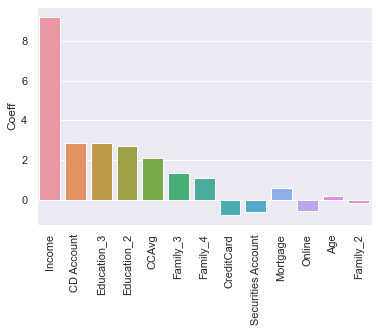

In [369]:
# Visual barplot of the coefficients
sns.barplot(x=model_coefficients.index, y = model_coefficients["Coeff"])
plt.xticks(rotation=90);

Printing the rows of the test data where the prediction does not match the observed data.

In [372]:
x_test["Actual"] = np.array(y_test) # appending the actual or test target variable to the dataframe
x_test["Predicted"] = np.array(ypred[0]) # appending the predicted target variable to the dataframe
x_test[x_test["Actual"] != x_test["Predicted"]] # displaying the rows where the prediction and the actual target variable are not the same

<ipython-input-372-730d4b7c26c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Actual"] = np.array(y_test) # appending the actual or test target variable to the dataframe
<ipython-input-372-730d4b7c26c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Predicted"] = np.array(ypred[0]) # appending the predicted target variable to the dataframe


,Age,Income,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Actual,Predicted
1632,0.181818,0.393519,0.310,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1028,0.136364,0.472222,0.250,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
737,0.931818,0.601852,0.280,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3217,0.954545,0.398148,0.410,0.188976,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1069,0.477273,0.310185,0.350,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,0.227273,0.518519,0.420,0.119685,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4993,0.500000,0.972222,0.667,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1793,0.272727,0.486111,0.080,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4659,0.113636,0.884259,0.633,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The 73 rows match with the sum of the Type 1 and 2 errors from the confusion matrix.

### 6. Conclusion

The classification goal is to predict the likelihood of a liability customer buying personal loans.  This needed to be balanced by the smaller budget that was mentioned for this second marketing campaign.  Precision was the most important metric because with a limited budget, we need the most bang for our buck.  In other words, the higher the precision, the less money we waste on customers not converting that we target with our marketing campaign.  However, we do not want to choose a precision of 1 (the maximum) as that would leave out some customers we could have won over.  I chose a precision of 0.9 because it still kept the F1 score relatively high so as to balance with the low recall score.  The ROC graph showed an area under the curve of 0.96 communicating that our model is rather good.

The model's threshold can be further fine-tuned if we have knowledge of the estimated cost per customer of the marketing campaign as well as the average expected profit from each conversion to a personal loan.  This model may be too conservative, shooting for too high of a precision score if the cost per customer of the marketing campaign is greatly dwarfed by the profit per customer conversion.